In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_theme(
    style='whitegrid',
    font_scale= 1.3,
    rc = {
        'text.color':'black',
        'axes.labelcolor':'black',
        'xtick.color' : 'black',
        'ytick.color' : 'black'}
)
palette_colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B3"] 

In [6]:
heart= pd.read_csv('dataset/heart.csv')

In [7]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
heart.shape

(918, 12)

In [9]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [10]:
heart.duplicated().sum()

np.int64(0)

In [11]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
df=heart.copy()

In [14]:
def annotate_val(ax, fmt='.0f'):
    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + p.get_width() /2
        ax.annotate(format(height,fmt),(x,height),ha='center',va='bottom')

def annotate_per(ax,total):
    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + p.get_width() /2

        ax.annotate(f' {height/total : .1%}', (x,height), ha='center',va='bottom')



## Which chest pain type has the highest heart disease risk?

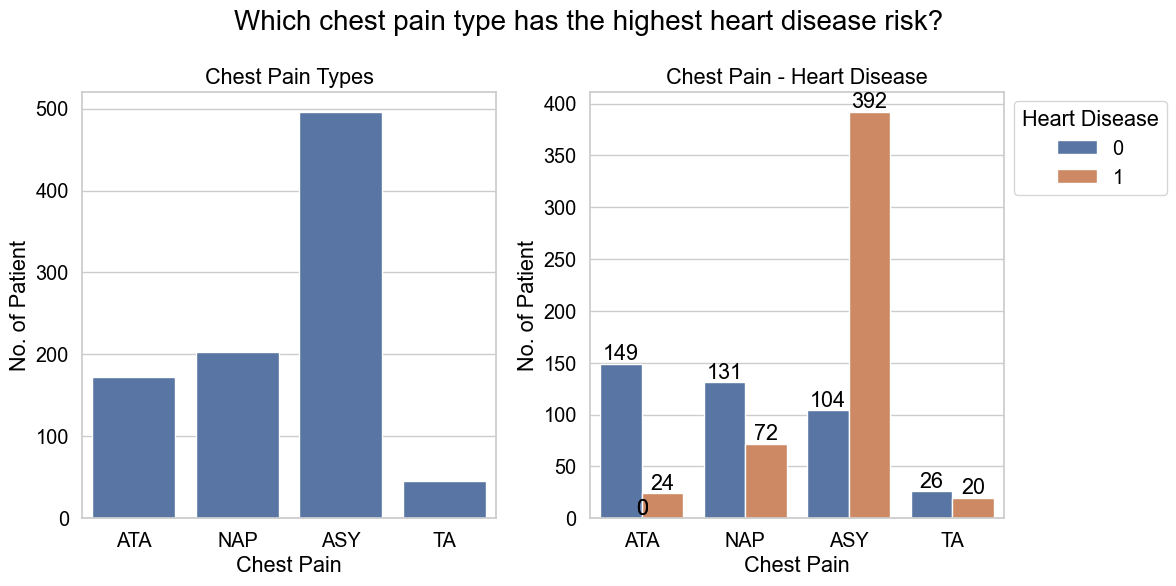

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=df,x='ChestPainType' ,ax=ax[0])
annotate_val(ax[1])
ax[0].set_xlabel('Chest Pain')
ax[0].set_ylabel('No. of Patient')
ax[0].set_title('Chest Pain Types')

sns.countplot(data=df,x='ChestPainType' ,hue='HeartDisease' ,ax=ax[1])
annotate_val(ax[1])
ax[1].set_xlabel('Chest Pain')
ax[1].set_ylabel('No. of Patient')
ax[1].set_title('Chest Pain - Heart Disease')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Heart Disease')

fig.suptitle("Which chest pain type has the highest heart disease risk?", fontsize=20)
plt.tight_layout(pad=1)

plt.show()

- **Asymptomatic (ASY)** chest pain has the highest number of patients and is also associated with the **highest likelihood of heart disease**.

- **Atypical angina (ATA)** shows a **lower probability of heart disease** compared to other chest pain types.

- **Typical angina (TA**) does not show a clear pattern; individuals with this type of chest pain **may or may not develop heart disease**, making it less predictable

## Can Young Patient Still have high Heart Disease Risk?

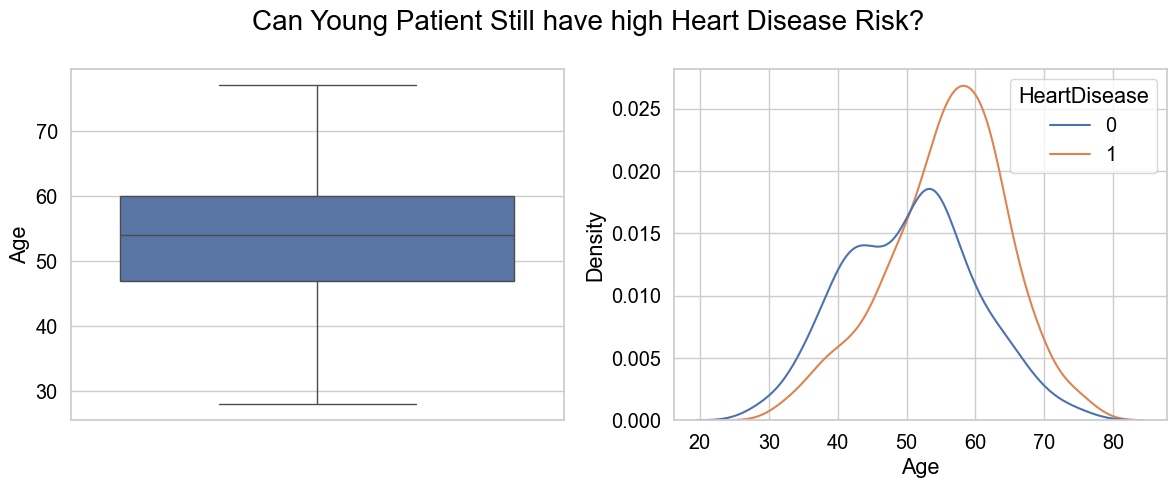

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df,y='Age',ax=ax[0])
sns.kdeplot(data=df,x='Age',hue='HeartDisease',ax=ax[1])

fig.suptitle("Can Young Patient Still have high Heart Disease Risk?", fontsize=20)
plt.tight_layout(pad=1)

plt.show()


- The boxplot shows that **most heart disease cases are concentrated in the 45–60 age group**, even though the overall age range in the dataset spans approximately 25 to 75 years.

- This indicates that **middle-aged individuals are at a higher risk** of developing heart disease compared to younger age groups.

- For younger individuals, the KDE plot shows that the **curve for no heart disease (0) is higher than the curve for heart disease (1)**, suggesting that younger people are **less likely to have heart disease**.

- Overall, **age appears to be a significant factor in heart disease occurrence**, with risk increasing notably after the age of 45.

## Is high cholesterol actually linked to heart disease in this dataset?

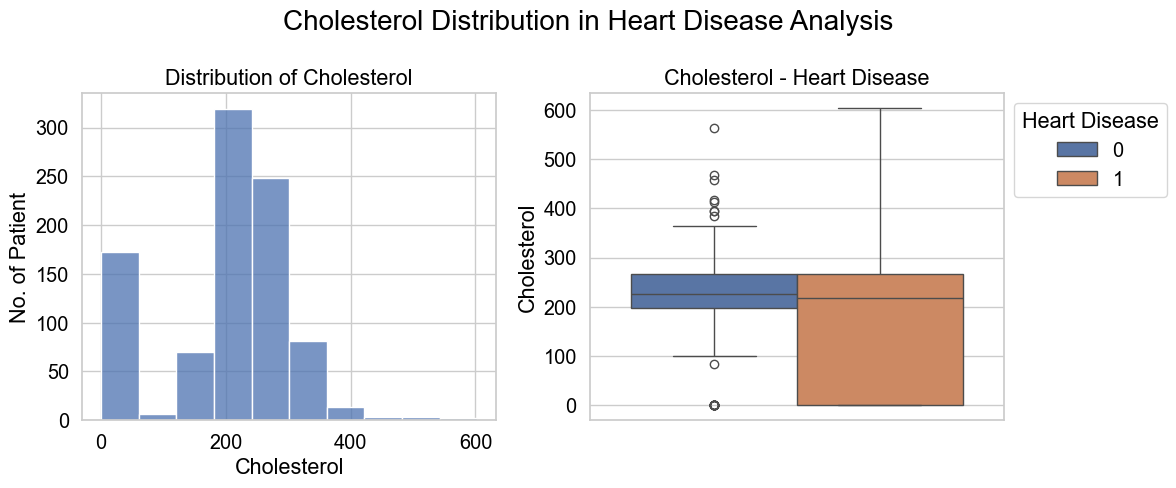

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df,x='Cholesterol',ax=ax[0],bins=10)
ax[0].set_ylabel('No. of Patient')
ax[0].set_title('Distribution of Cholesterol')
sns.boxplot(data=df,y='Cholesterol',hue='HeartDisease',ax=ax[1])

fig.suptitle("Cholesterol Distribution in Heart Disease Analysis", fontsize=20)
ax[1].set_title('Cholesterol - Heart Disease')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Heart Disease')
plt.tight_layout(pad=1)

plt.show()


While most healthy patients have **cholesterol around 200–250 mg/dL**, heart disease patients show a much wider **range (100–300 mg/dL).** This indicates **cholesterol alone is not a strong predictor**, and other factors (like age, max heart rate, or chest pain type) are critical for assessing risk.

## Is max heart rate a better predictor than cholesterol?

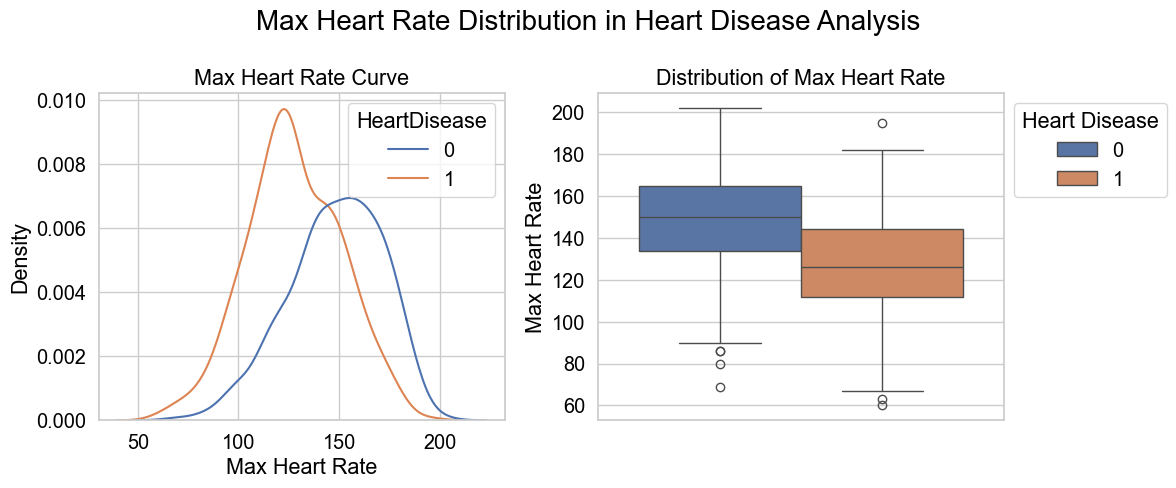

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))


sns.kdeplot(data=df,x='MaxHR',hue='HeartDisease',ax=ax[0])
ax[0].set_xlabel('Max Heart Rate')
ax[0].set_title('Max Heart Rate Curve')

sns.boxplot(data=df,y='MaxHR',hue='HeartDisease',ax=ax[1],)
ax[1].set_ylabel('Max Heart Rate')
ax[1].set_title('Distribution of Max Heart Rate')

fig.suptitle("Max Heart Rate Distribution in Heart Disease Analysis", fontsize=20)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Heart Disease')
plt.tight_layout(pad=1)
plt.show()

- **Medical Knowledge :** Patients with heart disease often cannot reach high maximum heart rates during exercise due to blocked arteries or heart muscle issues.

  Patients who achieve a **higher maximum heart rate (135–165 bpm) during exercise are more likely to be healthy**,while those with a **lower maximum heart rate (115–145 bpm) have higher chances of heart disease**. This confirms that exercise tolerance (MaxHR) is a **strong predictor of heart health**.

## Patients with Exercise-Angina reach lower Max Heart Rate

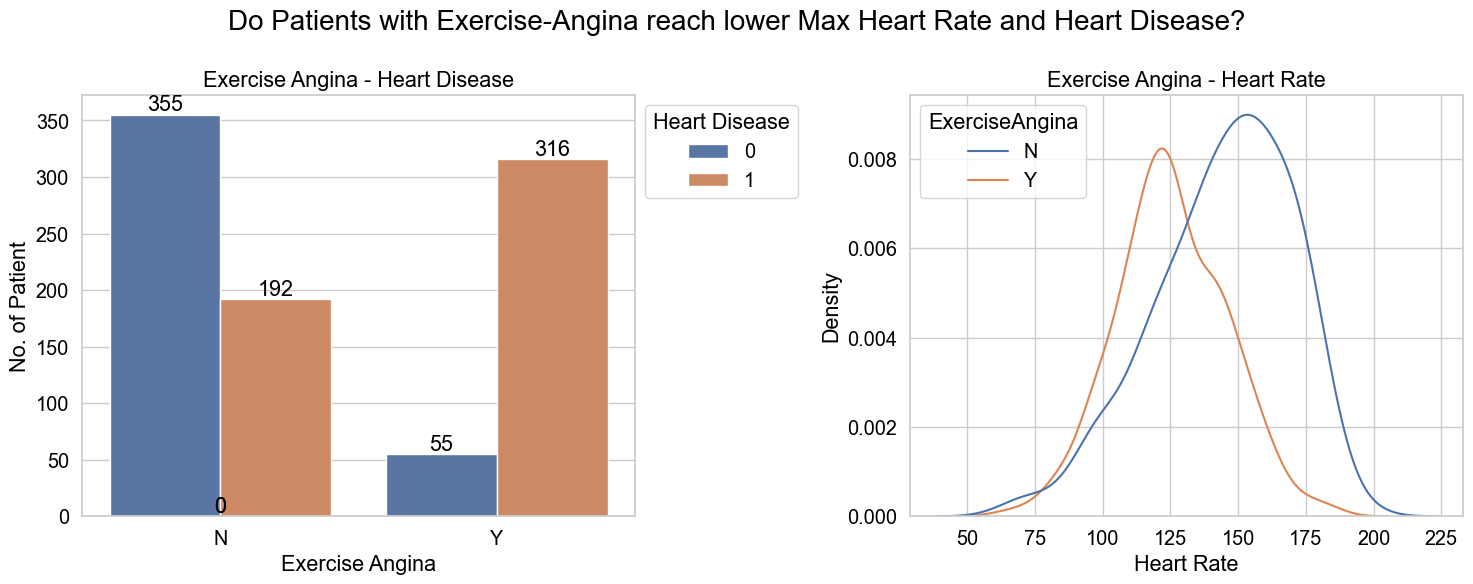

In [64]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.countplot(data=df, x='ExerciseAngina',hue='HeartDisease' ,ax=ax[0])
ax[0].set_xlabel('Exercise Angina')
ax[0].set_ylabel('No. of Patient')
ax[0].set_title('Exercise Angina - Heart Disease')
annotate_val(ax[0])
ax[0].legend(loc='upper left',bbox_to_anchor=(1,1),title='Heart Disease')

sns.kdeplot(data=df,x='MaxHR',hue='ExerciseAngina',ax=ax[1])
ax[1].set_xlabel('Heart Rate')
ax[1].set_title('Exercise Angina - Heart Rate')

fig.suptitle("Do Patients with Exercise-Angina reach lower Max Heart Rate and Heart Disease?", fontsize=20)
plt.tight_layout()

plt.show()

## How does ST depression (oldpeak) affect heart disease risk?

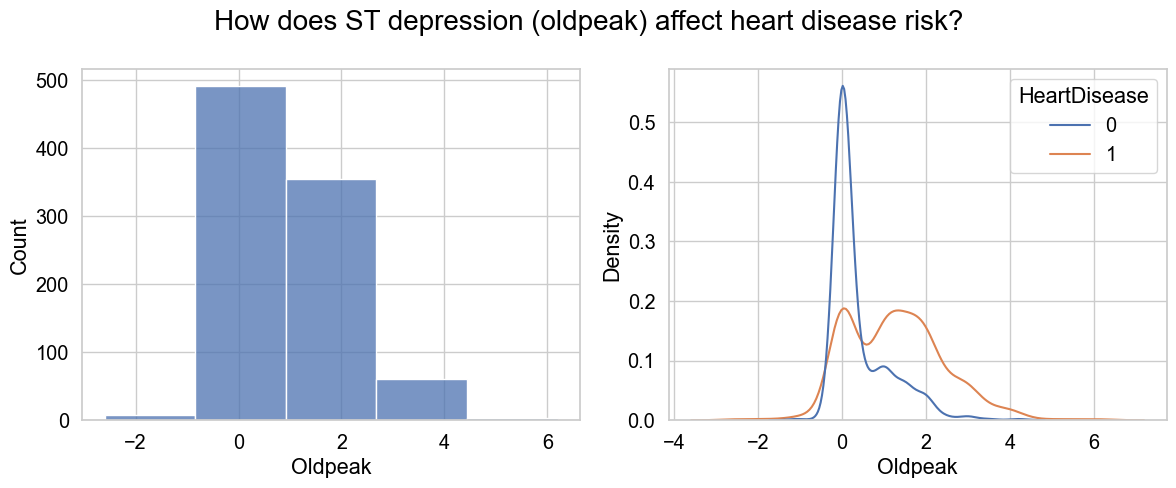

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df,x='Oldpeak',ax=ax[0],bins=5)
sns.kdeplot(data=df,x='Oldpeak',hue='HeartDisease',ax=ax[1])

fig.suptitle("How does ST depression (oldpeak) affect heart disease risk?", fontsize=20)
plt.tight_layout(pad=1)

plt.show()

- **Higher Oldpeak values → higher risk of heart disease**

Patients with little or **no ST depression (Oldpeak ~0) are mostly healthy**, while **higher Oldpeak values (1–4) are strongly associated with heart disease**. This confirms that **exercise-induced ST depression is a key risk factor for detecting heart problems**.

## Blood Pressure 

In [21]:
invalid_bp =df[df['RestingBP']<80]
heart.drop(invalid_bp.index,inplace=True)

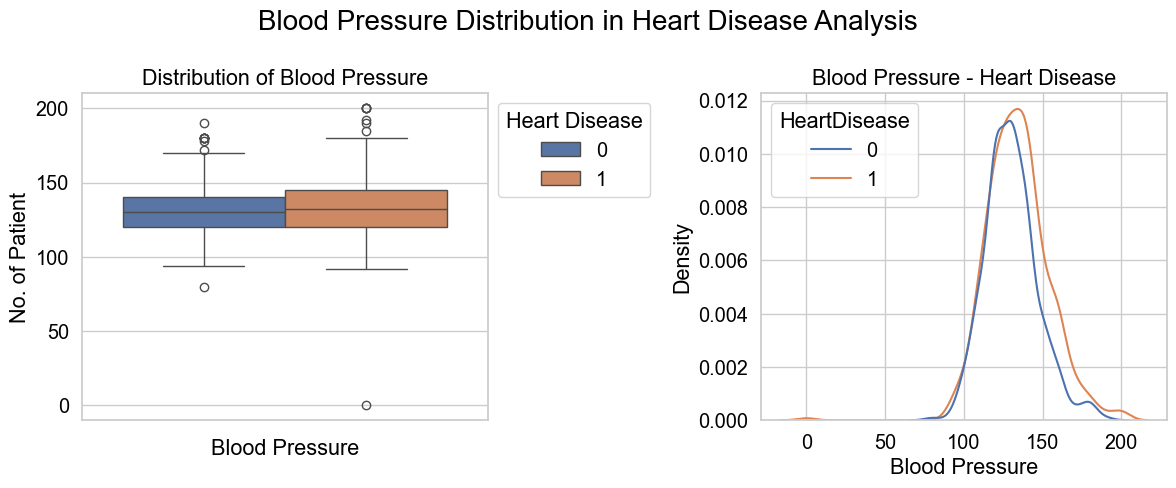

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, y='RestingBP',hue='HeartDisease',ax=ax[0])
ax[0].set_xlabel('Blood Pressure')
ax[0].set_ylabel('No. of Patient')
ax[0].set_title('Distribution of Blood Pressure')
ax[0].legend(loc='upper left',bbox_to_anchor=(1,1),title='Heart Disease')

sns.kdeplot(data=df,x='RestingBP',hue='HeartDisease',ax=ax[1])
ax[1].set_xlabel('Blood Pressure')
ax[1].set_title('Blood Pressure - Heart Disease')

fig.suptitle("Blood Pressure Distribution in Heart Disease Analysis", fontsize=20)
plt.tight_layout(pad=1)

plt.show()

Most patients, **both healthy and diseased**, have resting blood pressure between **120–155 mmHg**. Up to 125 mmHg, blood pressure does not distinguish between healthy and diseased patients. Slight differences appear after **140 mmHg, with diseased patients slightly more likely to have higher blood pressure**. This suggests that **resting BP alone is a weak indicator** of heart disease and should be considered alongside other features like MaxHR, Oldpeak, and ST slope.

## Does the risk of heart disease increase as the ST slope changes ?

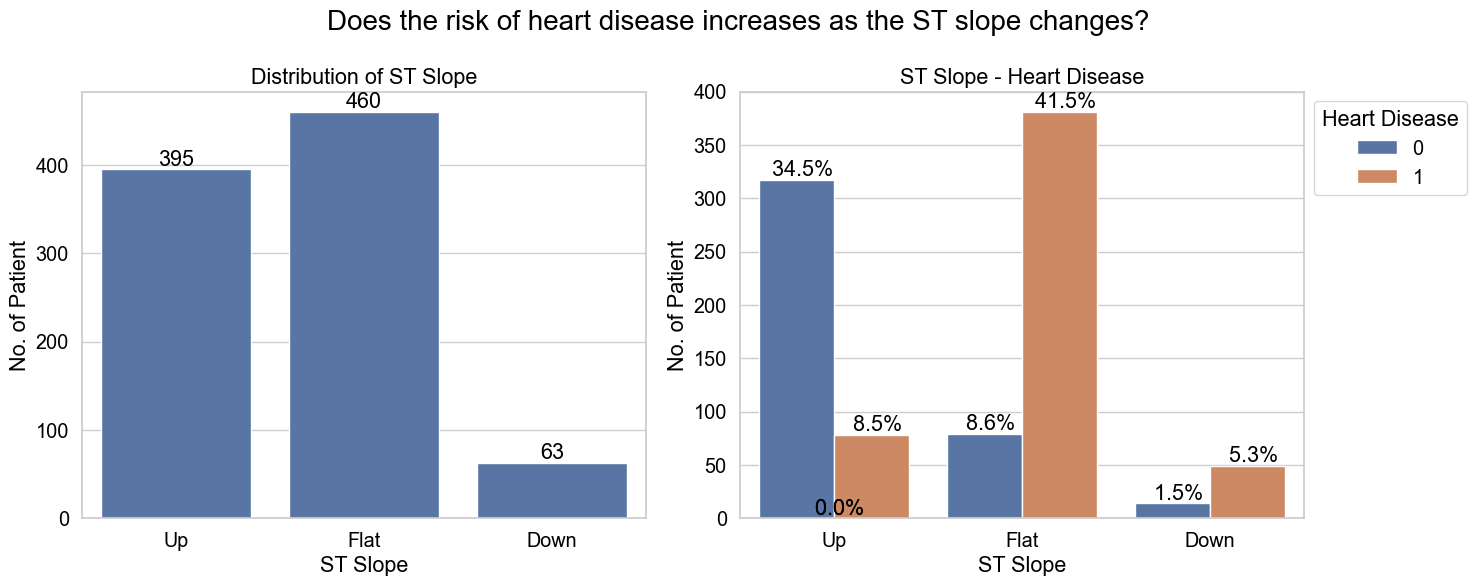

In [60]:
fig , ax = plt.subplots(1,2,figsize=(15,6))

sns.countplot(data=df,x='ST_Slope',ax=ax[0])
annotate_val(ax[0])
ax[0].set_xlabel('ST Slope')
ax[0].set_ylabel('No. of Patient')
ax[0].set_title('Distribution of ST Slope')

sns.countplot(data=df,x='ST_Slope',hue='HeartDisease',ax=ax[1])
ax[1].set_xlabel('ST Slope')
ax[1].set_ylabel('No. of Patient')
ax[1].set_title('ST Slope - Heart Disease')
annotate_per(ax[1],total=len(df))
ax[1].legend(loc='upper left',bbox_to_anchor=(1,1),title='Heart Disease')

fig.suptitle('Does the risk of heart disease increases as the ST slope changes?', fontsize=20)
plt.tight_layout(pad=1)

plt.show()

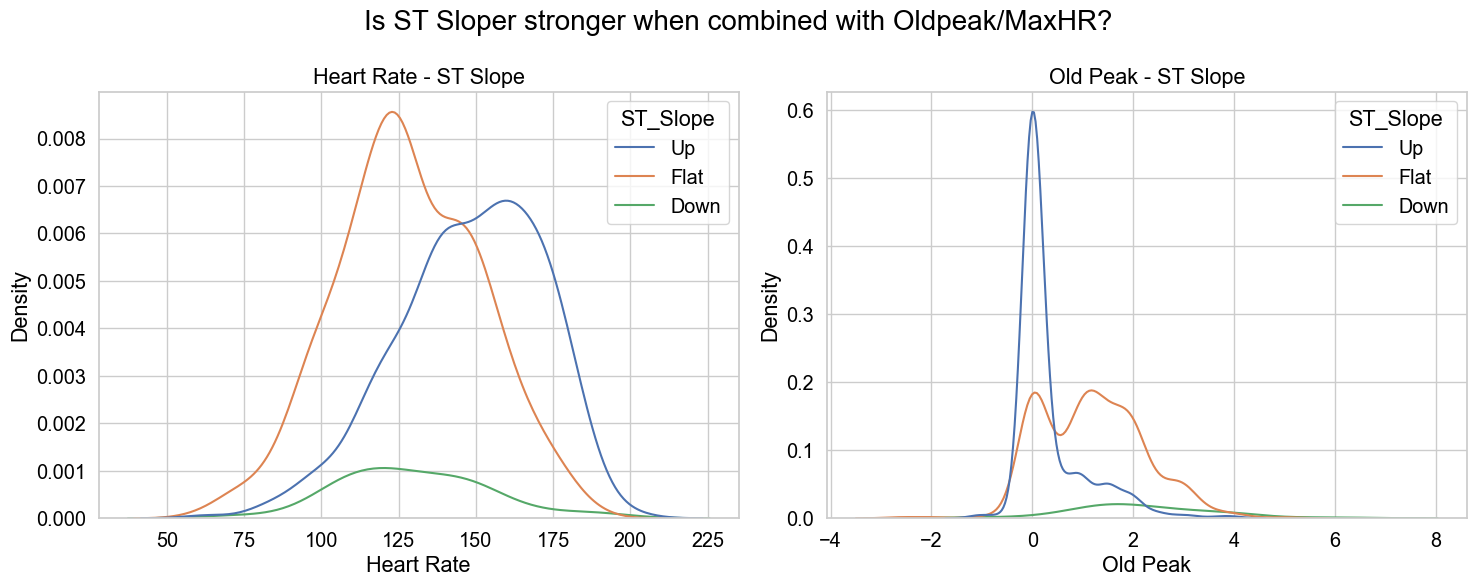

In [24]:
fig , ax = plt.subplots(1,2,figsize=(15,6))

sns.kdeplot(data=df,x='MaxHR',hue='ST_Slope',ax=ax[0])
ax[0].set_xlabel('Heart Rate')
ax[0].set_title('Heart Rate - ST Slope')

sns.kdeplot(data=df,x='Oldpeak',hue='ST_Slope',ax=ax[1])
ax[1].set_xlabel('Old Peak')
ax[1].set_title('Old Peak - ST Slope')

fig.suptitle('Is ST Sloper stronger when combined with Oldpeak/MaxHR?',fontsize=20)
plt.tight_layout(pad=1)
plt.show()

**ST slope is a strong predictor of heart disease**. Patients with **flat slopes have the highest risk**, followed by **downsloping slopes**. In contrast, **upsloping slopes are the safest, with only small percent of patients affected**.

The graphs also indicates that **exercise-induced ST segment behavior is a critical indicator of cardiac risk**, especially when combined with **other features like Oldpeak and MaxHR**.

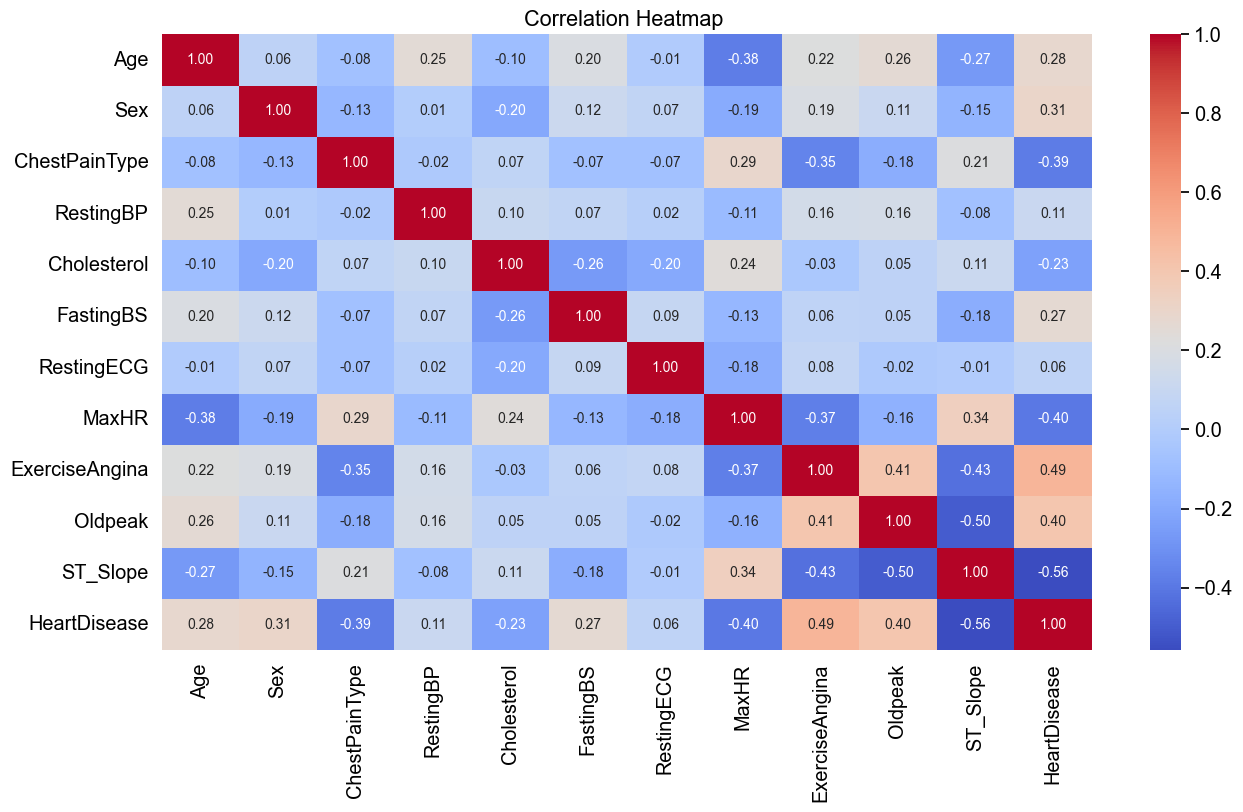

In [74]:
from sklearn.preprocessing import OrdinalEncoder
cat_col = df.select_dtypes('object').columns.tolist()
oe = OrdinalEncoder()
df1 = df.copy()
if cat_col:
    oe = OrdinalEncoder()
    df1[cat_col] = oe.fit_transform(df1[cat_col])
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),cmap='coolwarm',annot=True, fmt=".2f",annot_kws={"size": 10})
plt.title('Correlation Heatmap ')

plt.show()

## Feature Importance

In [76]:
from sklearn.preprocessing import OrdinalEncoder
cat_cols = df.select_dtypes('object').columns.tolist()
oe = OrdinalEncoder()
df[cat_cols]= oe.fit_transform(df[cat_cols])

In [77]:
X=df.drop('HeartDisease',axis=1)
y= df['HeartDisease']

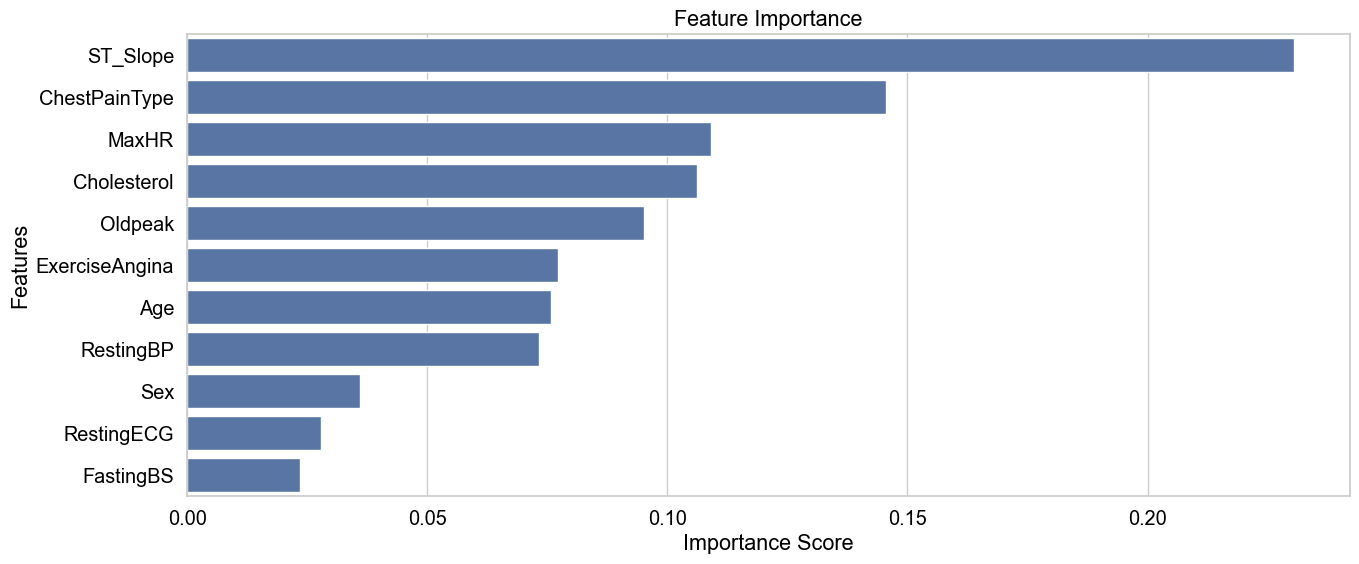

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)

# Feature importance
features= pd.Series(rf.feature_importances_, index=X.columns)
features= features.sort_values(ascending=False)
plt.figure(figsize=(15,9))
ax= plt.subplot(1,1,1)
sns.barplot(y=features.index,x=features.values,ax=ax)
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance')

plt.show()



In [89]:
final_df =heart[['Age','Sex','ChestPainType','Cholesterol','MaxHR','ST_Slope','ExerciseAngina','HeartDisease']]
final_df

,Age,Sex,ChestPainType,Cholesterol,MaxHR,ST_Slope,ExerciseAngina,HeartDisease
0,40,M,ATA,289,172,Up,N,0
1,49,F,NAP,180,156,Flat,N,1
2,37,M,ATA,283,98,Up,N,0
3,48,F,ASY,214,108,Flat,Y,1
4,54,M,NAP,195,122,Up,N,0
...,...,...,...,...,...,...,...,...
913,45,M,TA,264,132,Flat,N,1
914,68,M,ASY,193,141,Flat,N,1
915,57,M,ASY,131,115,Flat,Y,1
916,57,F,ATA,236,174,Flat,N,1


## Understanding the column terms
    
    chestpaintype - in this col we are given 4 types which are significantly related to heart failure.
            this col depicts the chest pain classification [how likely the chest pain is aginal (agina - chest 
            discomfort caused by insufficient blood flow to the heart)]

            there are 3 criteria that defines agina criteria based on this the type is given</pre>

| Abbreviation | Meaning          | Criteria Met |des
| ------------ | ---------------- | ------------ |---------------------------------------------------------------------------------------|
|     TA       | Typical Angina   | 3/3          |worryful                                                                               |
|     ATA      | Atypical Angina  | 2/3          |Still can be cardiac, but less specific than TA.                                       |
|     NAP      | Non-Anginal Pain | 0–1/3        |Much less likely to be related to coronary artery disease                              |
|     ASY      | Asymptomatic     | 0 symptoms   |No chest pain at all—often used for people with risk factors or evidence of ischemia without symptoms.|
<pre><hr>
    
    RestingBP - Resting BP (Resting Blood Pressure) refers to your blood pressure when you are relaxed, calm, and not 
            physically active, usually measured after sitting quietly for 5 minutes.</pre>
    
| Category                 | Systolic (top number) | Diastolic (bottom number) |
| ------------------------ | --------------------- | ------------------------- |
| Normal                   | < 120                 | < 80                      |
| Elevated                 | 120–129               | < 80                      |
| Hypertension Stage 1     | 130–139               | 80–89                     |
| Hypertension Stage 2     | ≥ 140                 | ≥ 90                      |
<pre><hr>


    Cholesterol -</pre>
Total Cholesterol Category
| Category            | Range       |
| ------------------- | ----------- |
| **Normal**          | < **200**   |
| **Borderline high** | **200–239** |
| **High**            | ≥ **240**   |

| Component             | Ideal Level                                  |info |
| --------------------- | -------------------------------------------- |---------------------------------------------------------------|
| **Total Cholesterol** | < 200 mg/dL                                  |Total cholesterol gives a general picture, but LDL matters most for heart disease.|
| **LDL**               | < 100 mg/dL (or lower in high-risk patients) |(“bad” cholesterol) - Major risk factor for heart attack and stroke|
| **HDL**               | > 40 mg/dL (men), > 50 mg/dL (women)         |(“good” cholesterol) - Higher HDL helps protect against heart disease|
| **Triglycerides**     | < 150 mg/dL                                  |High levels-increase risk pancreatitic heart - linked to obesity, high sugar intake, and diabetes|
<pre><hr>
    

    FastingBS -
    Fasting BS (Fasting Blood Sugar) is your blood glucose level after not eating or drinking anything with calories for 
    at least 8 hours. It is used to screen for diabetes and prediabetes.<hr>

    RestingECG -
    RestingECG means Resting Electrocardiogram — a standard 12-lead ECG done while you are lying still, relaxed, and 
    not exercising.It shows the electrical activity of your heart and helps detect heart problems.
        ['Normal','LVH','ST']
    
        ST - These may indicate ischemia, electrolyte problems, or hypertrophy.
        LVH - ECG shows electrical signs that the left ventricle is thickened—often due to: 
                        1.High blood pressure, 2.Aortic valve disease<hr>
    
    MaxHR - 
    Maximum Heart Rate — the highest heart rate your heart can safely achieve during max physical exertion.
    MaxHR = 220−age (in years)
</pre>

| Intensity | % of MaxHR | Example for 50 y/o (MaxHR = 170) |
| --------- | ---------- | -------------------------------- |
| Low       | 50–60%     | 85–102 bpm                       |
| Moderate  | 60–70%     | 102–119 bpm                      |
| High      | 70–85%     | 119–145 bpm                      |
<pre><hr>

 
    Exercise Angina refers to chest pain or discomfort that occurs during physical exertion (like walking, running, or 
    climbing stairs), usually caused by myocardial ischemia—the heart muscle not getting enough oxygen.<hr>


    Oldpeak - 
    refers to ST depression induced by exercise relative to rest, measured on an exercise stress test 
    (treadmill test / ECG stress test).
    Indicates how much the heart muscle is not getting enough oxygen under stress.

        Positive Oldpeak → ischemia
        Zero → normal
        Negative → unusual, may be error or special condition
</pre>
| Oldpeak (mm) | Meaning                                                  |
| ------------ | -------------------------------------------------------- |
| 0.0          | No ST depression → low likelihood of ischemia            |
| 0.1 – 1.0    | Mild ST depression → possible ischemia                   |
| 1.0 – 2.0    | Moderate ST depression → more significant ischemia       |
| > 2.0        | Severe ST depression → high likelihood of ischemia / CAD |
<pre><hr>

    
    ST_Slope -
    It describes the slope of the ST segment on the ECG during peak exercise. This helps evaluate myocardial ischemia and 
    coronary artery disease (CAD).</pre>

| Code | Meaning         | Clinical Significance                           |
| ---- | --------------- | ----------------------------------------------- |
| 1    | **Upsloping**   | Normal or less likely ischemia                  |
| 2    | **Flat**        | Possible ischemia; intermediate risk            |
| 3    | **Downsloping** | High likelihood of ischemia; higher risk of CAD |
<hr>
</pre>